# Question 1 - Regression Analysis with Automobile Miles Per Gallon Dataset

The auto-mpg dataset is a dataset which gives mileage of a vehicle in mpg(miles per gallon) based on several parameters.   

### Columns are:  
#### Input Features 
**cylinders**: number of cylinders in vehicle     
**displacement**: continuous variable  
**horsepower**: power of vehicle     
**weight**: weight of vehicle   
**acceleration**: acceleration of vehicle    
**model year**: year of vehicle model   
**origin**: origin of model  1 = Arizona 2 = Ohio  3 = Washington 

#### Output
**mpg**: Miles per gallon

## Tasks
1. Perform Linear Regression to predict the miles per gallon based on **relevant features**. 

## Mark Distribution
1. Are there any missing values, or values which are not numbers in any of the columns? Justify.
2. What is the minimum, maximum and standard deviation of the weight column for all the models in the 80s?
3. Plot the average horsepower & MPG of every year. Can you comment on the graph?
4. If customer is looking for a higher mileage vehicle, how many cylinder vehicle you will recommend without considering any other parameters?
5. Can you find out the average MPG rating for every origin state?

6. **Important** Design a final mpg value predictor model for entire dataset, try to increase speed of the model by considering only important input features. (Minimum acceptable accuracy is 70%) 

7. In 1996, A new vehicle model Nissan was manufactured in Ohio. Company published following specs - Cylinder=6, displacement= 300, horsepower=130, weight=4000, acceleration=17 but refused to comment anything on mpg rating, can you predict what could be the mpg rating based on your model?

8. A washington based business anlytics company obtained same dataset, and decided to create their own custom model for Washington state vehicles. What is mpg prediction for feature values same as Question 7? 

In [1]:
import pandas as pd
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [2]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [147]:
data=df[df['horsepower']!='?']
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
5,15.0,8,429.0,198,4341,10.0,70,1
6,14.0,8,454.0,220,4354,9.0,70,1
7,14.0,8,440.0,215,4312,8.5,70,1
8,14.0,8,455.0,225,4425,10.0,70,1
9,15.0,8,390.0,190,3850,8.5,70,1


In [3]:
op1=df[df['model year']==80]
print("Maximum of weight column:",op1['weight'].max())
print("Minimum of weight column:",op1['weight'].min())
print("Standard Deviation of weight column:",op1['weight'].std())

Maximum of weight column: 3381
Minimum of weight column: 1835
Standard Deviation of weight column: 432.23549102825126


Text(0,0.5,'miles')

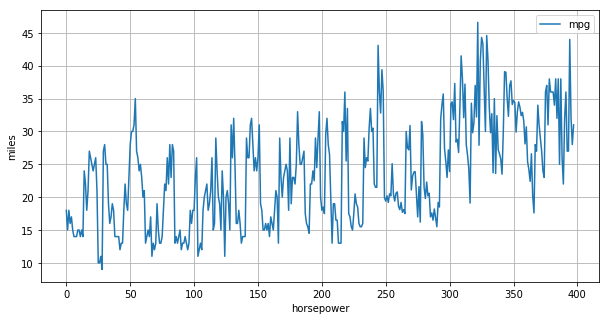

In [41]:
import matplotlib.pyplot as  plt
df[['horsepower','mpg']].plot(kind='line',grid=True, figsize=(10,5))
plt.xlabel("horsepower")
plt.ylabel("miles")
# the mpg is greater for less horsepower and vice versa

In [56]:
op2=df[df['cylinders']==4]
op2[['mpg','cylinders']].tail()
# To get higher mileage vehicle we need to have less number of cylinders

,mpg,cylinders
393,27.0,4
394,44.0,4
395,32.0,4
396,28.0,4
397,31.0,4


In [93]:
s1=df[df['origin']==1]
s2=df[df['origin']==2]
s3=df[df['origin']==3]
print("Average mpg for State 1:",s1['mpg'].mean())
print("Average mpg for State 2:",s2['mpg'].mean())
print("Average mpg for State 3:",s3['mpg'].mean())

Average mpg for State 1: 20.083534136546184
Average mpg for State 2: 27.89142857142857
Average mpg for State 3: 30.450632911392404


In [129]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['displacement','acceleration','weight','origin','cylinders','model year']],df['mpg'],test_size=0.3, random_state=100)

In [130]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

print(y_test)
model.predict(x_test) 

326    43.4
54     35.0
78     21.0
169    20.0
368    27.0
209    19.0
97     18.0
234    24.5
213    13.0
361    25.4
174    18.0
352    29.9
191    22.0
205    28.0
56     26.0
199    20.0
292    18.5
392    27.0
150    26.0
127    19.0
129    31.0
255    25.1
321    32.2
281    19.8
285    17.0
158    16.0
241    22.0
75     14.0
308    33.5
7      14.0
       ... 
333    32.7
342    30.0
378    38.0
309    41.5
293    31.9
90     12.0
6      14.0
188    16.0
381    36.0
125    20.0
305    28.4
284    20.6
3      16.0
20     25.0
19     26.0
269    30.9
15     22.0
338    27.2
60     20.0
151    31.0
84     27.0
157    15.0
80     22.0
242    21.5
140    14.0
31     25.0
203    29.5
233    29.0
45     18.0
314    26.4
Name: mpg, Length: 120, dtype: float64


array([31.56961985, 29.80689045, 20.68472164, 22.85533514, 29.2483629 ,
       22.11939379, 19.77555108, 24.95917897, 16.34658766, 28.68805452,
       21.00952493, 30.3612947 , 21.16458963, 30.10850481, 25.38374933,
       18.55912195, 19.84016117, 27.58205525, 26.94472767, 22.16514629,
       30.05259304, 25.58905619, 32.48148926, 25.18817785, 19.89401207,
       12.22246321, 26.0411831 , 12.77459579, 27.40047476, 10.97141868,
       34.86540469, 25.30643786, 20.60191479, 26.39831137, 27.06816185,
       23.29167922, 16.74967183, 29.64640826, 16.17396208, 15.68694519,
        7.0047566 ,  8.47815829, 16.43243232, 32.38339033, 16.62137196,
       21.25246711, 13.59145642, 14.13596662, 21.04022239, 32.9044696 ,
       27.81853983, 22.00440092, 34.65070472, 20.25412433, 20.49293393,
       17.89290276, 25.4569209 , 27.46436311,  8.57100234, 32.43156197,
       31.14308474, 23.61486407, 24.99496293, 19.35401453, 33.54851157,
       17.02673888, 23.05619142, 17.78323388, 30.38507396, 12.28

In [131]:
model.score(df[['displacement','acceleration','weight','origin','cylinders','model year']],df['mpg'])

0.8204641746192451

In [133]:
det=pd.DataFrame({'weight':[4000],'horsepower':[130],'mpg':[18.0],'displacement':[300.0],'cylinders':[6],'acceleration':[17.0],'model year':[96],'origin':[2]})
det

,weight,horsepower,mpg,displacement,cylinders,acceleration,model year,origin
0,4000,130,18.0,300.0,6,17.0,96,2


In [134]:
pred1=model.predict(det[['weight','displacement','acceleration','origin','cylinders','model year']]) 
print("Predicted mpg:",pred1)

Predicted mpg: [173.44460135]


In [138]:
det1=pd.DataFrame({'weight':[4000],'horsepower':[130],'mpg':[18.0],'displacement':[300.0],'cylinders':[6],'acceleration':[17.0],'model year':[96],'origin':[3]})
det1


,weight,horsepower,mpg,displacement,cylinders,acceleration,model year,origin
0,4000,130,18.0,300.0,6,17.0,96,3


In [139]:
pred2=model.predict(det1[['weight','displacement','acceleration','origin','cylinders','model year']]) 
print("Predicted mpg:",pred2)

Predicted mpg: [174.81214701]


In [145]:
op1=df[df["horsepower"]=='?']
op1.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1
